In [27]:
import cv2

In [28]:
import numpy as np

In [29]:
import sys

In [30]:
import matplotlib.pyplot as plt

In [31]:
def read_img(filename):
    img = cv2.imread(filename)
    return img

In [32]:
def edge_detection(img,line_wdt,blur):
    gray_scale=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray_scale_Blur=cv2.medianBlur(gray_scale,blur)
    edges=cv2.adaptiveThreshold(gray_scale_Blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_wdt,blur)
    return edges

In [33]:
def color_quantisation(img,k):
    data=np.float32(img).reshape((-1,3))
    criteria=(cv2.TermCriteria_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
    ret, label, center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    result=center[label.flatten()]
    result=result.reshape(img.shape)
    return result

In [34]:
img= read_img(r'C:\Users\DELL\Pictures\Screenshots/Screenshot (9).png')
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

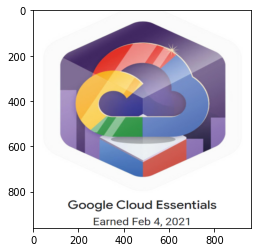

In [35]:
oimage=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
if oimage is None:
    print("cannot find image")
    sys.exit()
gsize=cv2.resize(oimage,(960,960))
plt.imshow(gsize,cmap='gray')

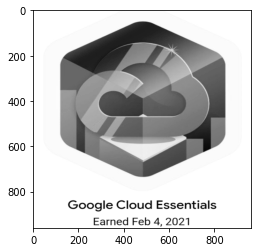

In [36]:
gimage=cv2.cvtColor(oimage,cv2.COLOR_BGR2GRAY)
gsize1=cv2.resize(gimage,(960,960))
plt.imshow(gsize1,cmap='gray')

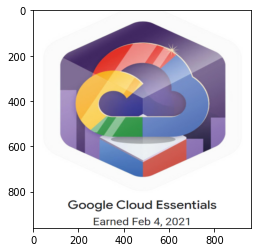

In [37]:
sgray=cv2.medianBlur(gsize1,13)
gsize2=cv2.resize(oimage,(960,960))
plt.imshow(gsize2,cmap='gray')

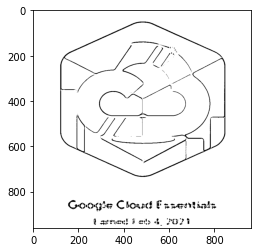

In [38]:
gedge=cv2.adaptiveThreshold(sgray,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,9,7)
gsize3=cv2.resize(gedge,(960,960))
plt.imshow(gsize3,cmap='gray')

In [39]:
line_wdt=9

In [40]:
blur_value=7

In [41]:
totalColors=4

In [42]:
oimage=color_quantisation(oimage,totalColors)

In [43]:
edgeImg= edge_detection(oimage,line_wdt,blur_value)

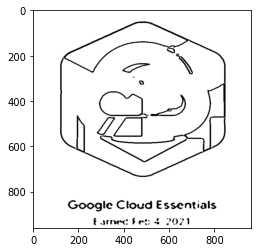

In [44]:
gsize3_1=cv2.resize(edgeImg,(960,960))
plt.imshow(gsize3_1,cmap='gray')

In [45]:
blurred=cv2.bilateralFilter(oimage,d=7,sigmaColor=150,sigmaSpace=150)

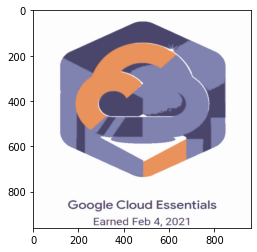

In [46]:
gsize4=cv2.resize(blurred,(960,960))
plt.imshow(gsize4,cmap='gray')

In [47]:
img=color_quantisation(img,totalColors)

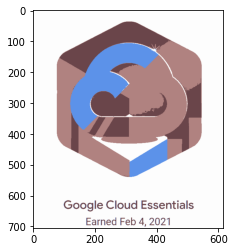

In [48]:
plt.imshow(img)

In [49]:
edgeImg= edge_detection(img,line_wdt,blur_value)

In [50]:
blurred=cv2.bilateralFilter(img,d=7,sigmaColor=150,sigmaSpace=150)

In [51]:
cartoon=cv2.bitwise_and(blurred,blurred,mask=edgeImg)

In [52]:
cv2.imwrite('cartoon2.jpg',cartoon)

True